# IMPORTS

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from math import sqrt

# PREPROCESSING
Importing dataset

In [170]:
med_insurancedf = pd.read_csv('medical_insurance.csv')

Printing head

In [171]:
print(med_insurancedf.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Getting more info

In [172]:
med_insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Getting statistics info

In [173]:
med_insurancedf.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Checking nulls in dataset

In [174]:
med_insurancedf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking unique values of categorical data

In [175]:
for col in med_insurancedf.select_dtypes(include=['object']).columns:
    print(f'Column - {col} - unique values: {med_insurancedf[col].unique()}')

Column - sex - unique values: ['female' 'male']
Column - smoker - unique values: ['yes' 'no']
Column - region - unique values: ['southwest' 'southeast' 'northwest' 'northeast']


Handling categorical data

In [176]:
for col in ['sex', 'smoker']:
    med_insurancedf[col] = pd.get_dummies(med_insurancedf[col], drop_first=True).astype(int)

med_insurancedf = med_insurancedf.rename(columns={'sex': 'male'})

In [177]:
encoder = LabelEncoder()
region_encoded = encoder.fit_transform(med_insurancedf['region'])
med_insurancedf['region'] = region_encoded

# VISUALIZING
Distribution of charges

Text(0.5, 1.0, 'Distribution of Charges')

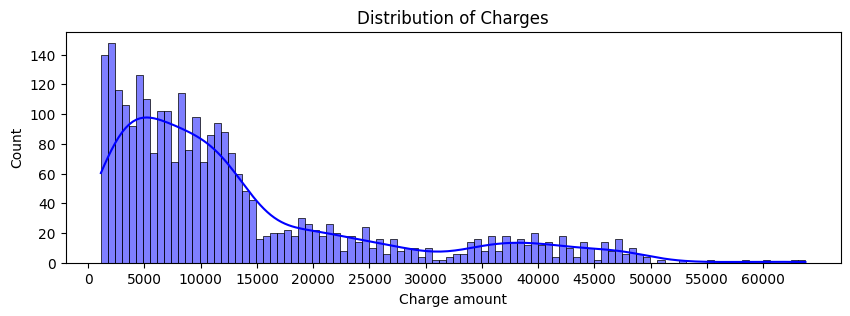

In [178]:
plt.figure(figsize=(10, 3))
sns.histplot(data=med_insurancedf, x='charges', color='b', kde=True, bins=100)
plt.xticks(range(0, 60001, 5000))
plt.xlabel('Charge amount')
plt.title('Distribution of Charges')

# Most charges are between 3000 - 15000

Relation between Age x Charges

Text(0.5, 1.0, 'Age x Charge amount relation')

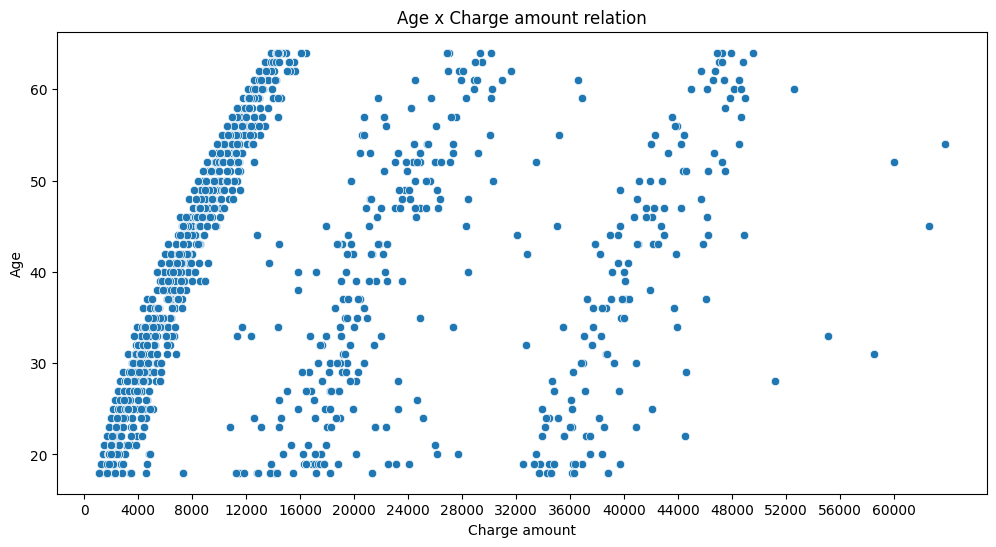

In [179]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=med_insurancedf, x='charges', y='age')
plt.ylabel('Age')
plt.xlabel('Charge amount')
plt.xticks(range(0, 60001, 4000))
plt.title('Age x Charge amount relation')

Relation between smoking and charges

Text(0.5, 1.0, 'Smoker x Charge amount relation')

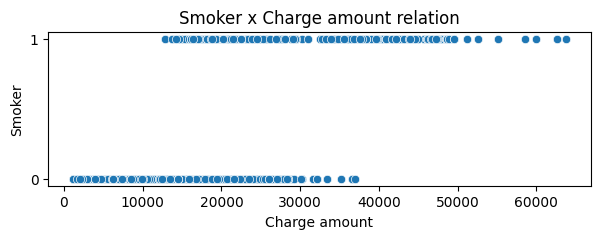

In [180]:
plt.figure(figsize=(7, 2))
sns.scatterplot(data=med_insurancedf, x='charges', y='smoker')
plt.yticks(range(0, 2))
plt.ylabel('Smoker')
plt.xlabel('Charge amount')
plt.title('Smoker x Charge amount relation')

BMI distribution

Text(0.5, 1.0, 'BMI Distribution')

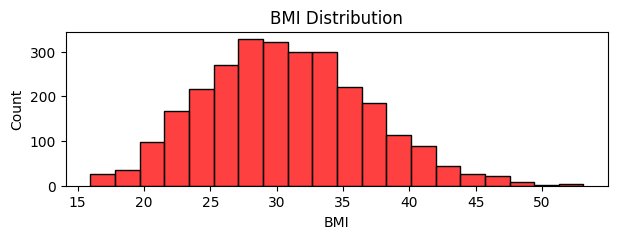

In [181]:
plt.figure(figsize=(7, 2))
sns.histplot(data=med_insurancedf, x='bmi', kde=False, bins=20, color='r')
plt.xlabel('BMI')
plt.title('BMI Distribution')

Correlation map

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'male'),
  Text(2.5, 0, 'bmi'),
  Text(3.5, 0, 'children'),
  Text(4.5, 0, 'smoker'),
  Text(5.5, 0, 'region'),
  Text(6.5, 0, 'charges')])

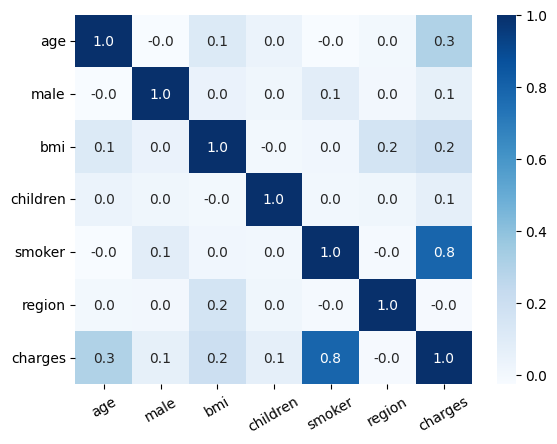

In [182]:
sns.heatmap(data=med_insurancedf.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.xticks(rotation=30)

# AI
Data separation

In [183]:
X = med_insurancedf[['age', 'male', 'bmi', 'children', 'smoker']]
y = med_insurancedf['charges']

Checking shape to decide test_size

In [184]:
med_insurancedf.shape

(2772, 7)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [186]:
lr = LinearRegression()

In [187]:
lr.fit(X_train, y_train)

LinearRegression()

In [188]:
predictions = lr.predict(X_test)

In [189]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", round(rmse, 2))

Root Mean Squared Error: 6151.85


In [190]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae.round(2))

Mean Absolute Error: 4247.65


In [191]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2.round(2))

R-squared: 0.75
